In [1]:
import math
import json

file = "test/multilayer.json"

def linear(net):
    return net

def relu(net):
    return max(0, net)

def sigmoid(net):
    try:
        return 1 / (1 + math.exp((-1) * net))
    except OverflowError:
        return 0

def softmax(net):
    try:
        total_softmax = 0
        for i in range(len(net)):
            net[i] = math.exp(net[i])
            total_softmax += net[i]
        for i in range(len(net)):
            net[i] = net[i] / total_softmax
    except OverflowError: 
        for i in range(len(net)):
            net[i] = 1
    return net        

def classification(net, type):
    if (type == "linear"):
        return net
    elif (type == "sigmoid"):
        if (net > 0.5):
            return "Kelas Positif"
        else:
            return "Kelas Negatif"
    elif (type == "reLU"):
        return net
    elif (type == "softmax"):
        return net.index(max(net))

def countSSE(output, expected):
    res = 0
    for i in range(len(output)):
        temp = output[i] - expected[i]
        res += temp**2
    return res

In [2]:
f = open(file, "r")
data = json.load(f)
case = data["case"]

#Input
inp = case["input"]

#activation
activation = []
for i in case["model"]["layers"]:
    activation.append(i['activation_function'])

#neuron
neuron = [case["model"]["input_size"]]
for i in case["model"]["layers"]:
    neuron.append(i['number_of_neurons'])

#weight
weight = case['weights']

#expected output
expect = data["expect"]
eoutput = expect["output"]
sse = expect["max_sse"]
f.close()

In [3]:
instance = 0
for item in inp:
    print("\nInstance:", item)
    h = [item]
    for i in range(len(weight)):
        h.append([0 for j in range(neuron[i + 1])])
        net = [0 for j in range(neuron[i + 1])]
        for k in range(len(weight[i][0])):
            net[k] += weight[i][0][k]
        for j in range(1, len(weight[i])):
            for k in range(len(weight[i][j])):
                net[k] += h[i][j - 1] * weight[i][j][k]
        
        if activation[i] == "softmax":
            h[i+1] = eval(activation[i] + "({})".format(net))
        else:
            for j in range(len(net)):
                h[i + 1][j] = eval(activation[i] + "({})".format(net[j]))

    print("Output:", h[len(h)-1])
    print("Expected output:", eoutput[instance])
    print("sse:", countSSE(h[len(h)-1],eoutput[instance]))
    print("max_sse:", sse)
    print(countSSE(h[len(h)-1],eoutput[instance]) <= sse)
    instance += 1


Instance: [1.0, 0.0]
Output: [2.0, 0]
Expected output: [2.0, 0.0]
sse: 0.0
max_sse: 1e-06
True

Instance: [0.0, 1.0]
Output: [0, 2.0]
Expected output: [0.0, 2.0]
sse: 0.0
max_sse: 1e-06
True

Instance: [0.0, 0.0]
Output: [0, 0]
Expected output: [0.0, 0.0]
sse: 0.0
max_sse: 1e-06
True


In [4]:
hiddenLayer = len(neuron)-2
print("x("+ str(neuron[0]) +")", end=" --> ")
for i in range(hiddenLayer):
    print("h"+str(i+1)+"("+ str(neuron[i+1]) +")", end=" --> ")
print("y("+ str(neuron[len(neuron)-1]) +")\n")

print("Weight:")
print("\tInput layer:")
if (hiddenLayer == 0):
    for i in range(int(neuron[1])):
        print("\t* b -> y("+str(i+1)+") = "+ str(weight[0][0][i]))
    for i in range(int(neuron[0])):
        for j in range(int(neuron[1])):
            print("\t* x("+ str(i+1) +") -> y("+ str(j+1)+") = "+ str(weight[0][i+1][j]))
else:
    for i in range(int(neuron[1])):
        print("\t* b -> h1("+str(i+1)+") = "+ str(weight[0][0][i]))
    for i in range(int(neuron[0])):
        for j in range(int(neuron[1])):
            print("\t* x("+ str(i+1) +") -> h1("+ str(j+1)+") = "+ str(weight[0][i+1][j]))

if hiddenLayer != 0:
    print("\n\tHidden Layer:")
    for i in range(hiddenLayer):
        if (i+1 == hiddenLayer):
            print("\th"+str(i+1))
            for m in range(int(neuron[i+2])):
                print("\t* b -> y("+ str(m+1) + ") = "+ str(weight[i+1][0][m]))
            for n in range(int(neuron[i+1])):
                for k in range(int(neuron[i+2])):
                    print("\t* h"+ str(i+1) + "(" + str(n+1) + ") -> y("+ str(k+1) +") = "+ str(weight[i+1][n+1][k]))
        else:
            print("\th"+str(i+1))
            for m in range(int(neuron[i+2])):
                print("\t* b -> h"+ str(i+2) + "(" + str(m+1)+") = "+ str(weight[i+1][0][m]))
            for n in range(int(neuron[i+1])):
                for k in range(int(neuron[i+2])):
                    print("\t* h"+ str(i+1) + "(" + str(n+1) +") -> h"+ str(i+2) + "(" + str(k+1)+") = "+ str(weight[i+1][n+1][k]))

print("\nActivation function:")
for i in range(len(activation)):
    if i == 0:
        if len(activation) == 1:
            print("x --> y = " + activation[i])
        else:
            print("x --> h1 = " + activation[i])
    elif i == len(activation)-1:
        print("h"+ str(i) +" --> y = " + activation[i])
    else:
        print("h"+ str(i) +" --> h"+ str(i+1) + " = " + activation[i])

x(2) --> h1(2) --> y(2)

Weight:
	Input layer:
	* b -> h1(1) = 0.5
	* b -> h1(2) = 0.5
	* x(1) -> h1(1) = 0.0
	* x(1) -> h1(2) = -2.0
	* x(2) -> h1(1) = -1.0
	* x(2) -> h1(2) = 0.0

	Hidden Layer:
	h1
	* b -> y(1) = 0.5
	* b -> y(2) = 0.5
	* h1(1) -> y(1) = 0.0
	* h1(1) -> y(2) = -3.0
	* h1(2) -> y(1) = -1.0
	* h1(2) -> y(2) = 0.0

Activation function:
x --> h1 = linear
h1 --> y = relu


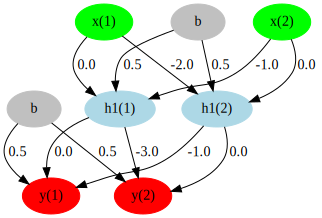

In [5]:
# README

'''
Untuk menjalankan graphviz, pastikan file executable graphviz sudah dimasukkan ke dalam path environtment.
File executable dapat diinstall melalui link berikut.
https://graphviz.org/download/
'''

import graphviz

dot = graphviz.Digraph(comment='Neural Network')

output_node = 0

if (hiddenLayer != 0):
    for i in range(len(weight)):
        for j in range(len(weight[i])):
            k = len(weight[i][j])
            if (i == 0):
                if (j == 0):
                    dot.node('bx', 'b', color='grey', style='filled')
                else:
                    dot.node('x'+ str(j), 'x('+ str(j)+')', color='green', style='filled')
            else:
                if (j == 0):
                    dot.node('bh'+ str(i), 'b', color='grey', style='filled')
                else:
                    dot.node('h'+ str(i) + str(j), 'h'+str(i)+'('+ str(j)+')', color='lightblue', style='filled')
                if (j == len(weight[i])-1):
                    output_node = k

    for l in range(output_node):
        dot.node('y'+ str(l+1), 'y('+ str(l+1)+')', color='red', style='filled')
else:
    for j in range(len(weight[0])):
        k = len(weight[0][j])
        if (j == 0):
            dot.node('bx', 'b', color='grey', style='filled')
        else:
            dot.node('x'+ str(j), 'x('+ str(j)+')', color='green', style='filled')
        if (j == len(weight[i])-1):
            output_node = k
    for l in range(output_node):
        dot.node('y'+ str(l+1), 'y('+ str(l+1)+')', color='red', style='filled')
    

if (hiddenLayer != 0):
    for i in range(len(weight)):
        for j in range(len(weight[i])):
            for k in range(len(weight[i][j])):
                if (i == 0):
                    if (j == 0):
                        dot.edge('bx', 'h'+ str(i+1) + str(k+1), dir = "forward", label=str(weight[i][j][k]))
                    else:
                        dot.edge('x'+ str(j), 'h'+ str(i+1) + str(k+1), dir = "forward", label=str(weight[i][j][k]))
                else:
                    if (i != len(weight)-1):
                        if (j == 0):
                            dot.edge('bh'+ str(i), 'h'+ str(i+1) + str(k+1), dir = "forward", label=str(weight[i][j][k]))
                        else:
                            dot.edge('h'+ str(i) + str(j), 'h'+ str(i+1) + str(k+1), dir = "forward", label=str(weight[i][j][k]))
                    else:
                        if (j == 0):
                            dot.edge('bh'+ str(i), 'y'+str(k+1), dir = "forward", label=str(weight[i][j][k]))
                        else:
                            dot.edge('h'+ str(i) + str(j), 'y'+ str(k+1), dir = "forward", label=str(weight[i][j][k]))
else:
    for j in range(len(weight[0])):
        for k in range(len(weight[0][j])):
            if (j == 0):
                dot.edge('bx', 'y' + str(k+1), dir = "forward", label=str(weight[i][j][k]))
            else:
                dot.edge('x'+ str(j), 'y' + str(k+1), dir = "forward", label=str(weight[i][j][k]))
dot

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=56b1b1ce-1c62-4041-be46-2baef4341b50' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>